In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
    
from sklearn.cluster import KMeans 
# ^^ for fewer than 10,000 data points, else KMeans minibatch

## Reading in datasets

In [2]:
df8 = pd.read_csv('GCJ Code\\gcj2008.csv', index_col='number') # individual file
df9 = pd.read_csv('GCJ Code\\gcj2009.csv', index_col='number') # individual file
df10 = pd.read_csv('GCJ Code\\gcj2010.csv', index_col='number') # individual file
df11 = pd.read_csv('GCJ Code\\gcj2011.csv', index_col='number') # individual file
df12 = pd.read_csv('GCJ Code\\gcj2012.csv', index_col='number') # individual file
df13 = pd.read_csv('GCJ Code\\gcj2013.csv', index_col='number') # individual file
df14 = pd.read_csv('GCJ Code\\gcj2014.csv', index_col='number') # individual file
df15 = pd.read_csv('GCJ Code\\gcj2015.csv', index_col='number') # individual file
df16 = pd.read_csv('GCJ Code\\gcj2016.csv', index_col='number') # individual file
df17 = pd.read_csv('GCJ Code\\gcj2017.csv', index_col='number') # individual file

# for i in dfs:
#     i = pd.read_csv('GCJ Code\\gcj2008.csv', index_col='number')

In [3]:
result = pd.concat([df8, df9, df10, df11])
np.shape(result)

(294257, 8)

In [4]:
df8.head()            # taking a peek at the data

,year,round,username,task,solution,file,full_path,flines
number,,,,,,,,
0,2008,32002,MikeSeibert,24445,0,EndlessKnight.java,gcj/2008/32002/MikeSeibert/24445/0/extracted/E...,import java.util.Scanner;\n \n public class En...
1,2008,32002,MikeSeibert,24444,1,Pockets.java,gcj/2008/32002/MikeSeibert/24444/1/extracted/P...,import java.util.Scanner;\n \n public class Po...
2,2008,32002,MikeSeibert,24444,0,Pockets.java,gcj/2008/32002/MikeSeibert/24444/0/extracted/P...,import java.util.Scanner;\n \n public class Po...
3,2008,32002,MikeSeibert,24446,0,NoCheating.java,gcj/2008/32002/MikeSeibert/24446/0/extracted/N...,import java.util.Scanner;\n \n public class No...
4,2008,32002,bhamrick,24445,0,D.cpp,gcj/2008/32002/bhamrick/24445/0/extracted/D.cpp,#include<cstdio>\n #include<cstdlib>\n \n #def...


## Detecting common authors between years

In [5]:
authors08 = set(df8['username'])
authors09 = set(df9['username'])
authors10 = set(df10['username'])
authors11 = set(df11['username'])
authors12 = set(df12['username'])
authors13 = set(df13['username'])
authors14 = set(df14['username'])
authors15 = set(df15['username'])
authors16 = set(df16['username'])
authors17 = set(df17['username'])

auths = [authors08, authors09, authors10, authors11, authors12, authors13, authors14, authors15, authors16, authors17]
dfs = [df8, df9, df10, df11, df12, df13, df14, df15, df16, df17]
# print(len(authors08))
for auth, df in zip(auths, dfs):
    print(f'There are {len(auth)} unique authors in {df.shape[0]} files')

There are 6923 unique authors in 49096 files
There are 8152 unique authors in 64227 files
There are 10034 unique authors in 71946 files
There are 11680 unique authors in 108988 files
There are 17584 unique authors in 103219 files
There are 21001 unique authors in 142733 files
There are 25179 unique authors in 157606 files
There are 23089 unique authors in 141196 files
There are 26958 unique authors in 223899 files
There are 25103 unique authors in 185595 files


In [7]:
print(f'2008 and 2009 have {len(set(authors08).intersection(authors09))} authors in common.')
print(f'2008 and 2010 have {len(set(authors08).intersection(authors10))} authors in common.')
print(f'2008 and 2011 have {len(set(authors08).intersection(authors11))} authors in common.')
print(f'2009 and 2010 have {len(set(authors09).intersection(authors10))} authors in common.')
print(f'2009 and 2011 have {len(set(authors09).intersection(authors11))} authors in common.')
print(f'2010 and 2011 have {len(set(authors10).intersection(authors11))} authors in common.')

2008 and 2009 have 2470 authors in common.
2008 and 2010 have 2064 authors in common.
2008 and 2011 have 1708 authors in common.
2009 and 2010 have 3841 authors in common.
2009 and 2011 have 2936 authors in common.
2010 and 2011 have 4511 authors in common.


In [8]:
# print(len(set(authors08).intersection(authors09, authors10, authors11, authors12,
#                                       authors13, authors14, authors15, authors16, authors17)))

common = list(set(authors08).intersection(authors09, authors10, authors11, authors12,
                                      authors13, authors14, authors15, authors16, authors17))
commonSort = repr(sorted((common))).replace("'", "").split(",")

commonSort[181]='xithan'
commonSort[0]='2rf'

for i in range(len(commonSort)):
    commonSort[i] = commonSort[i].lstrip()

print(f'There are {len(commonSort)} common authors across all years.')

There are 182 common authors across all years.


In [10]:
auth8 = []                # Creates an author list for 2008
for i in range(len(df8['username'])):
    try:
        auth8.append(df8['username'][i])
    except (KeyError, TypeError):           
        pass

counts = []               # Counts the number of submission for an author in 2008
for x in commonSort:
    counts.append(auth8.count(x))
# print(counts) 

# print the counts next to the names
print(f'The {len(commonSort)} authors and number of submissions for 2008:\n')
for i, (count, name) in enumerate(zip(counts, commonSort)):
    print("{0:25}{1:3}".format(name, count), end = '          ')
    if (i+1) % 3 == 0:
        print()

The 182 authors and number of submissions for 2008:

2rf                        7          ASotelo                   11          AjJi                       4          
Akerfeldt                  3          Al.Cash                   22          Alon                       8          
Cata                      12          Darko                     13          Demasi                    12          
DoC                       20          EmK                       19          Eryx                      40          
Felix                     15          FerranAlet                 3          Flyke                      4          
Frank                      8          GeKa                      13          Gnurdux                   13          
Guineapig                 16          GunnERs                   17          Hachimori                 20          
HenrikRueping             18          HiltonLange               39          Ignat                     14          
KirillB                    

In [11]:
# Authors with most submissions:
topAuths = np.argsort(counts)[::-1]
print("The top 10 authors from 2008 are\n")
for i in topAuths[:10]:
    print("{0:15}{1:3}".format(commonSort[i],counts[i]))

The top 10 authors from 2008 are

bmerry          45
Eryx            40
HiltonLange     39
dzhulgakov      39
wata            38
pmnox           36
krijgertje      35
radeye          35
LinesPrower     35
pashka          35


## Breaking datasets into text files

In [7]:
# for j in [df8, df9, df10, df11]:
year=0
for df in dfs:
    for i in range(df.shape[0]):
        try:
            if df['year'][i] != year:
                year = df['year'][i]
                print(df['year'][i], "=",year)  
                os.chdir('C:\\Users\\rainb\\Stylometry')            
                os.mkdir(f"{year+1}")
                os.chdir(f"{year}")    
            fileName=df['file'][i].replace(".","")
            fname=f"{df['username'][i]}_{df['task'][i]}_{df['solution'][i]}_{i}_{fileName}.txt"
            outfile=open(fname,"w", encoding="utf-8")
            outfile.write(df['flines'][i])
            outfile.close()
        except (KeyError, TypeError):           
            pass  

## Creating corpus

In [12]:
codeFiles = []
j = 0
for df in dfs:
#     print(j)
#     print(df.shape[0])
    j=0
    for i in range(df.shape[0]):
        j=i
        try:
            codeFiles.append(df['flines'][i])
        except KeyError:
            pass
# print(codeFiles[0])

## Removing NAN values

In [13]:
cleanedList = [x for x in codeFiles if str(x) != 'nan']

## Transforming into TFIDF Vector

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2),analyzer='word',min_df=.05, max_df=.85)
X = vectorizer.fit_transform(cleanedList)

## K-Means Clustering

In [11]:
from sklearn import metrics
import time

start_time = time.time()
for k in range (2,5):
    true_k = k
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    model.fit(X)

    print(f"Top terms per K = {k} cluster:")
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print(f"\nnCluster {i}:"),
        for ind in order_centroids[i, :10]:
            print(f'{terms[ind]}')
        
    print(f"\nScore for K={k}: {model.score(X):.3f}")
    print(f"Silhouette Coefficient for K={k}: {metrics.silhouette_score(X, model.labels_, sample_size=10000):.3f}")
    print(f"K={k} finished in {(time.time()-start_time)/60} minutes.\n")
    
    centroids = model.cluster_centers_
    plt.scatter(centroids[:,0], centroids[:,1],marker='x', color='black', s=150, linewidths=9)
    plt.suptitle(f"Cluster Centroids for K = {k}")
    
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally
# indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

# from https://pythonprogramminglanguage.com/kmeans-text-clustering/"

Top terms per K = 2 cluster:

nCluster 0:
new
import
string
public
java
import java
readline
print
line
static

nCluster 1:
include
scanf
define
printf
cin
return
int int
long
cout
ans

Score for K=2: -238499.233
Silhouette Coefficient for K=2: 0.080
K=2 finished in 77.48292016983032 seconds

Top terms per K = 3 cluster:

nCluster 0:
print
def
range
end
line
sys
len
split
readline
append

nCluster 1:
new
string
java
public
import java
import
static
integer
io
java io

nCluster 2:
include
scanf
define
printf
cin
return
int int
long
cout
ans

Score for K=3: -227496.084
Silhouette Coefficient for K=3: 0.093
K=3 finished in 219.13121938705444 seconds

Top terms per K = 4 cluster:

nCluster 0:
print
def
range
end
line
sys
len
split
readline
append

nCluster 1:
new
string
java
public
import java
import
static
integer
io
java io

nCluster 2:
scanf
printf
include
ans
int int
return
freopen
printf case
int scanf
char

nCluster 3:
include
define
cin
cout
vector
long
endl
return
int int
string

S

## Determining Pairwise Similarity

In [102]:
# Creating individual lists by year
cf08 = []
cf09 = []
cf10 = []
cf11 = []
cfs = [cf08, cf09, cf10, cf11]

for cf, df in zip(cfs, dfs):
    for i in range(df.shape[0]):
        try:
            cf.append(df['flines'][i])
        except KeyError:
            pass

## Plotting centroids and data

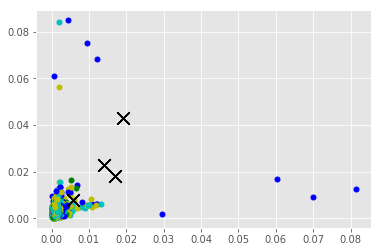

In [109]:
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

centroids = model.cluster_centers_
labels = model.labels_
colors = ['g.','b.', 'c.', 'y.', 'r.']     # extra colors: {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};

# no need to normalize, since Vectorizer will return normalized tf-idf
for cf in cfs:
    cf = [c for c in cf if str(c) != 'nan']
    X = vectorizer.fit_transform(cf)
    X.eliminate_zeros()    
    pairwise_similarity = X.T.dot(X)             # the real code produces a matrix too large
    pScale = normalize(pairwise_similarity, norm='l1', axis=1)
    pairs = pScale.toarray()
    
    for x in range(np.shape(pairs)[0]):
        plt.plot(pairs[x,0],pairs[x,1],colors[labels[x]], marker='.', markersize=10)

    plt.scatter(centroids[:,0], centroids[:,1],marker='x', color='black', s=150, linewidths=9, zorder=10)

## Creating a WordCloud 

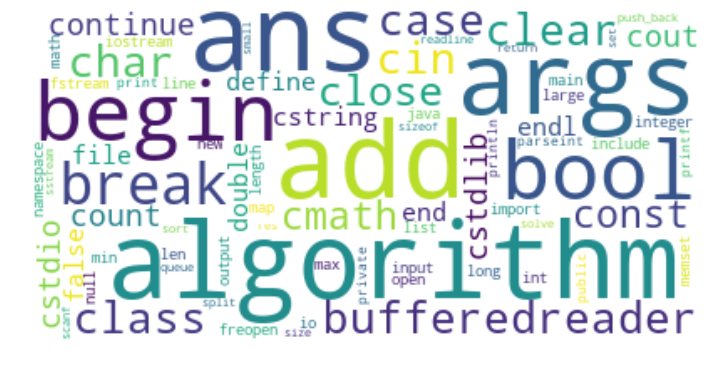

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# this vectorizer will skip stop words
vectorizer2 = CountVectorizer(stop_words='english',analyzer='word',min_df=.10)

# # fit the vectorizer on the training text
vectorizer2.fit(cleanedList)

# get the vectorizer's vocabulary
inv_vocab = {v: k for k, v in vectorizer2.vocabulary_.items()}
vocabulary = [inv_vocab[i] for i in range(len(inv_vocab))]

# print(vectorizer2.vocabulary_.values())

words = ' '.join(word for word in vocabulary)
    
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=75, background_color="white").generate(words)
# stopwords!='STOPWORDS'

# Display the generated image:
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# vectorization example
# pd.DataFrame(data=vectorizer.transform(test_texts).toarray(),index=["test sentence"], columns=vocabulary)

## Latent Dirichlet Allocation - Topic Modeling

In [15]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import PlaintextCorpusReader as pcr
import warnings
warnings.filterwarnings('ignore') 
import gensim
import pyLDAvis.gensim
import IPython
import inflect
from gensim import corpora, models
import string

In [16]:
# Preprocessing steps
exclude = set(string.punctuation) 
token = RegexpTokenizer(r'\w+') # look into what RegexpTokenizer actually does '[A-Z]\w+'
stop = set(stopwords.words('english'))
# stop_words.extend(['word']) # can customize stopwords to include anything you specifically want to ignore
num = inflect.engine()
lemma = WordNetLemmatizer()

def clean(doc):
    raw = doc.lower()
    puncs = ''.join(ch for ch in raw if ch not in exclude)
    tokens = token.tokenize(puncs)
    tokens2 = [i for i in tokens if len(i) > 2]
    stops = [i for i in tokens2 if i not in stop]
    nums = [number for number in stops if not number.isdigit()]   
    lemmas = [lemma.lemmatize(word) for word in nums]    # change stops to nums if inflect is working
    return lemmas

In [17]:
# Importing our Documents to be cleaned
path = "C:\\Users\\rainb\\Stylometry\\years\\2008"
doc_complete = pcr(path, r'.*\.txt')

doc_clean=[]
# Cleaned and tokenized documents
for i, file in enumerate(doc_complete.fileids()):
    doc_clean.append(clean(doc_complete.raw(file)))
#     print("\n Single Tokens: \n Document:", file, "\n", doc_clean[i],"\n\n")
    
print(np.shape(doc_clean))    
print("\nDocs are clean!")

(49096,)

Docs are clean!


In [18]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above (Bag of Words).
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]
print("Corpus created!")

Corpus created!


In [21]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
# LdaMulti = gensim.models.ldamulticore.LdaMulticore

# Running and Training LDA model on the document term matrix.
print("\n Starting normal LDA model: \n")
ldamodel = Lda(corpus, num_topics=5, id2word=dictionary, iterations=50)
for idx, topic in ldamodel.print_topics(-1):     # -1 for all topics, else (num_topics= , num_words=)
    print('Topic: {} Word: {}'.format(idx, topic))


 Starting normal LDA model: 

Topic: 0 Word: 0.127*"int" + 0.068*"include" + 0.032*"return" + 0.027*"define" + 0.018*"long" + 0.017*"forint" + 0.017*"else" + 0.012*"string" + 0.011*"main" + 0.011*"using"
Topic: 1 Word: 0.020*"file" + 0.017*"char" + 0.014*"define" + 0.008*"int" + 0.007*"return" + 0.006*"unsigned" + 0.005*"null" + 0.005*"struct" + 0.005*"void" + 0.004*"typedef"
Topic: 2 Word: 0.042*"double" + 0.031*"return" + 0.030*"case" + 0.030*"end" + 0.018*"else" + 0.017*"print" + 0.015*"def" + 0.013*"time" + 0.012*"begin" + 0.010*"train"
Topic: 3 Word: 0.336*"googol" + 0.018*"coolbot" + 0.016*"portugal" + 0.013*"island" + 0.012*"hnh" + 0.012*"egypt" + 0.012*"mauritius" + 0.011*"chile" + 0.009*"search" + 0.009*"ecuador"
Topic: 4 Word: 0.097*"int" + 0.051*"new" + 0.037*"public" + 0.030*"string" + 0.029*"import" + 0.025*"static" + 0.021*"return" + 0.017*"void" + 0.012*"private" + 0.012*"class"


In [22]:
#### VISUALIZE THE TOPICS!!!
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.168637 -0.211148       1        1  39.381649
4     -0.152161  0.003909       2        1  29.663187
2     -0.095012  0.248070       3        1  17.958679
3      0.421213 -0.027340       4        1   7.734506
1     -0.005404 -0.013492       5        1   5.261980, topic_info=      Category           Freq              Term          Total  loglift  \
term                                                                      
1759   Default  175645.000000            googol  175645.000000  30.0000   
8      Default  536668.000000               int  536668.000000  29.0000   
7      Default  182085.000000           include  182085.000000  28.0000   
110    Default  104714.000000               new  104714.000000  27.0000   
118    Default   74978.000000            public   74978.000000  26.0000   
1      Default   56722.000000            double   56722.000000  25.0000   
781    Default   76212.000000            define   76212.000000  24.0000   
845    Default   36457.000000               end   36457.000000  23.0000   
124    Default   50329.000000            static   50329.000000  22.0000   
90     Default   65256.000000            import   65256.000000  21.0000   
17     Default   64041.000000              case   64041.000000  20.0000   
199    Default   28066.000000              char   28066.000000  19.0000   
24     Default   20622.000000             print   20622.000000  18.0000   
125    Default   94752.000000            string   94752.000000  17.0000   
403    Default   19729.000000              file   19729.000000  16.0000   
400    Default   18610.000000               def   18610.000000  15.0000   
117    Default   24892.000000           private   24892.000000  14.0000   
165    Default  167684.000000            return  167684.000000  13.0000   
132    Default   59175.000000              void   59175.000000  12.0000   
87     Default   69493.000000            forint   69493.000000  11.0000   
594    Default   26902.000000               std   26902.000000  10.0000   
890    Default   24804.000000           typedef   24804.000000   9.0000   
2544   Default   14152.000000             begin   14152.000000   8.0000   
1737   Default    9168.000000           coolbot    9168.000000   7.0000   
96     Default   62170.000000              long   62170.000000   6.0000   
1830   Default    8456.000000          portugal    8456.000000   5.0000   
780    Default   23916.000000              cout   23916.000000   4.0000   
778    Default   22936.000000               cin   22936.000000   3.0000   
783    Default   22967.000000              endl   22967.000000   2.0000   
82     Default   17274.000000              args   17274.000000   1.0000   
...        ...            ...               ...            ...      ...   
3596    Topic5     383.016510             iter1     394.960938   2.9140   
7837    Topic5    1323.795654              echo    1539.743530   2.7936   
5920    Topic5     761.689087            target     851.344360   2.8334   
12712   Topic5     695.461670             exit1     779.927795   2.8300   
3688    Topic5     919.217346             sizet    1230.135986   2.6533   
2969    Topic5     665.713379               que     836.652466   2.7161   
891     Topic5    2215.373291          unsigned    4092.366211   2.3310   
2469    Topic5    1455.903931             endif    2369.541504   2.4576   
403     Topic5    7063.140625              file   19729.417969   1.9174   
2480    Topic5     926.101196             ifdef    1341.739746   2.5739   
8113    Topic5     800.106140            buffer    1140.218628   2.5904   
199     Topic5    6182.869629              char   28066.066406   1.4319   
5715    Topic5     842.527710  templatetypename    1404.249512   2.4338   
1234    Topic5    1513.862671              argc    3936.581055   1.9890   
19255   Topic5     545.240356            stdcin     72

## Plotting Accuracy of Supervised Learning Models

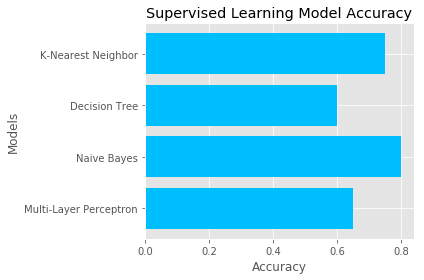

In [34]:
# Creating a visualization of 4
X = ['Multi-Layer Perceptron', 'Naive Bayes', 'Decision Tree', 'K-Nearest Neighbor']             # Models used for supervised learning
Y = [.65, .8, .6, .75]
    
n_features = len(X)
plt.barh(range(n_features), Y, color='deepskyblue', align='center')   #  'deepskyblue', 'violet', 'aquamarine'
plt.yticks(np.arange(n_features), X)
plt.xlabel("Accuracy")
plt.ylabel("Models")
# plt.legend(loc='best')
plt.title('Supervised Learning Model Accuracy')
plt.tight_layout()